In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#Data Review

In [2]:
data=pd.read_csv('/content/drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
data[['Age','Na_to_K']].corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


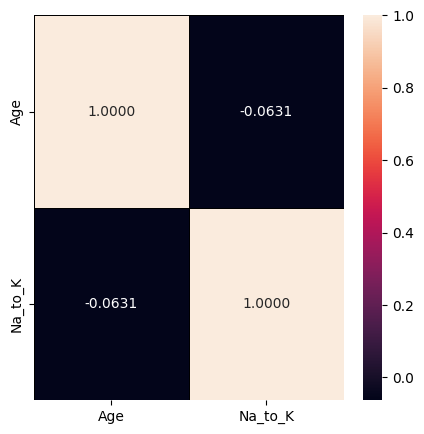

In [6]:
numeric_data=data[['Age','Na_to_K']]
correlation_matrix=numeric_data.corr()
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(correlation_matrix,annot=True,linewidths=0.5,linecolor='black',fmt='.4f',ax=ax)
plt.show()

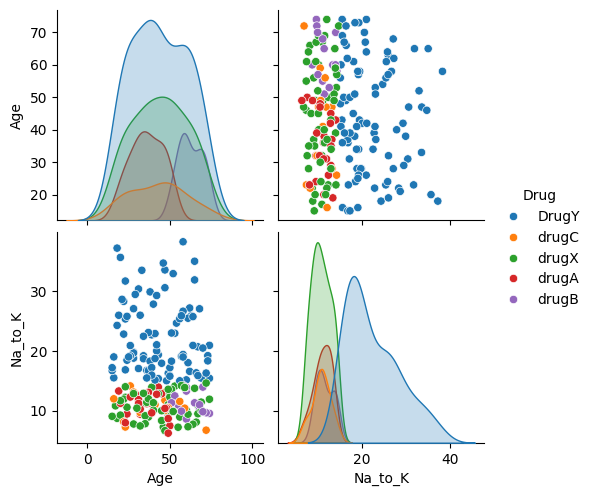

In [7]:
sns.pairplot(data,hue='Drug')

In [8]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [9]:
data['Age'].value_counts(dropna=False)

,count
Age,
47,8
23,7
28,7
49,7
39,6
32,6
50,5
37,5
58,5


In [10]:
data['Sex'].value_counts()

,count
Sex,
M,104
F,96


In [11]:
data['BP'].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [12]:
data['Cholesterol'].value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


In [13]:
data['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


#Data Visualiation

In [14]:
dataAge=data['Age'].value_counts(dropna=False)
npar_dataAge=np.array(dataAge)
x=list(npar_dataAge)
y=data.Age.value_counts().index

DataAge={'Age':y,'Number':x}
DataAge=pd.DataFrame(DataAge)

fig=px.bar(DataAge,x='Age',y='Number')
fig.show()

In [15]:
colors=['gold','mediumturquoise']

fig=go.Figure(data=[go.Pie(labels=['M','F'],values=[104,96])])
fig.update_traces(hoverinfo='label+percent',textinfo='value',textfont_size=20,marker=dict(colors=colors,line=dict(color='#000000',width=2)))
fig.show()

In [16]:
fig=px.bar(x=['HIGH','LOW','NORMAL'],y=[77,64,59])
fig.show()

In [17]:
fig=px.histogram(x=['HIGH','NORMAL'],y=[103,97])
fig.show()

In [18]:
fig=go.Figure(data=[go.Pie(labels=['DrugY','DrugX','DrugA','DrugC','DrugB'],values=[91,54,23,16,16])])
fig.update_traces(hoverinfo='label+percent',textinfo='value',textfont_size=20,marker=dict(colors=px.colors.sequential.RdBu,line=dict(color='#000000',width=2)))
fig.show()

In [19]:
fig=px.scatter(data,x='Na_to_K',y='Age',color='Drug',size='Age',hover_data=['Na_to_K'])
fig.show()

#Classification Models

Data Preparing

In [20]:
dataclass=pd.read_csv('/content/drug200.csv')
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [21]:
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [22]:
dataclass.Sex=[1 if i=='F' else 0 for i in dataclass.Sex]
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,DrugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,0,LOW,HIGH,12.006,drugC
197,52,0,NORMAL,HIGH,9.894,drugX
198,23,0,NORMAL,NORMAL,14.020,drugX


In [23]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(dataclass.BP)):
  if dataclass.BP[i]=='LOW':
    dataclass.BP[i]=2
  elif dataclass.BP[i]=='NORMAL':
    dataclass.BP[i]=1
  else:
    dataclass.BP[i]=0
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,HIGH,25.355,DrugY
1,47,0,2,HIGH,13.093,drugC
2,47,0,2,HIGH,10.114,drugC
3,28,1,1,HIGH,7.798,drugX
4,61,1,2,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,HIGH,11.567,drugC
196,16,0,2,HIGH,12.006,drugC
197,52,0,1,HIGH,9.894,drugX
198,23,0,1,NORMAL,14.020,drugX


In [24]:
dataclass.Cholesterol=[1 if i=='HIGH' else 0 for i in dataclass.Cholesterol]
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,DrugY
1,47,0,2,1,13.093,drugC
2,47,0,2,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,2,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,0,2,1,12.006,drugC
197,52,0,1,1,9.894,drugX
198,23,0,1,0,14.020,drugX


In [25]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(dataclass)):
  if dataclass.Drug[i]=='DrugY':
    dataclass.Drug[i]=4
  elif dataclass.Drug[i]=='drugX':
    dataclass.Drug[i]=3
  elif dataclass.Drug[i]=='drugA':
    dataclass.Drug[i]=2
  elif dataclass.Drug[i]=='drugC':
    dataclass.Drug[i]=1
  else:
    dataclass.Drug[i]=0
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,4
1,47,0,2,1,13.093,1
2,47,0,2,1,10.114,1
3,28,1,1,1,7.798,3
4,61,1,2,1,18.043,4
...,...,...,...,...,...,...
195,56,1,2,1,11.567,1
196,16,0,2,1,12.006,1
197,52,0,1,1,9.894,3
198,23,0,1,0,14.020,3


In [26]:
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.5+ KB


In [27]:
data_types_dict={'BP':int,'Drug':int}
dataclass=dataclass.astype(data_types_dict)
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


ㄴ모든 피처의 타입이 숫자형으로 바뀜

In [28]:
x_data=dataclass.drop(['Drug'],axis=1)
y_data=dataclass.Drug.values
x_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,0,1,25.355
1,47,0,2,1,13.093
2,47,0,2,1,10.114
3,28,1,1,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,0,2,1,12.006
197,52,0,1,1,9.894
198,23,0,1,0,14.020


In [29]:
y_data

array([4, 1, 1, 3, 4, 3, 4, 1, 4, 4, 1, 4, 4, 4, 3, 4, 3, 2, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 0, 3, 4, 3, 3, 2, 3, 3, 3, 4, 0, 4, 3,
       3, 3, 2, 1, 4, 4, 4, 3, 4, 4, 0, 1, 0, 4, 3, 4, 4, 2, 4, 3, 0, 4,
       2, 3, 4, 4, 0, 4, 3, 4, 4, 4, 2, 4, 2, 3, 0, 3, 1, 2, 1, 0, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2, 2, 1, 3, 4, 3, 3, 4, 0, 4,
       2, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 0, 2, 0, 3, 2, 4, 0, 4, 2, 3, 3, 2, 3, 1, 2, 0, 3, 3,
       4, 1, 2, 4, 1, 3, 3, 0, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 3, 3, 4, 4, 4, 0, 2, 4, 4, 4, 2, 4, 1, 4, 1, 1, 3,
       3, 3])

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=1)

Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)

predict=dtc.predict(x_test)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(predict,y_test))

The accuracy of the Decision Tree is 0.9666666666666667


ㄴx_train,y_train을 사용하여 결정트리 모델 학습&x_test에 대한 예측 수행 후 정확도 출력

crietrion parameter: 노드의 불순도를 측정하는 ㅏㅇ법

-gini index: 무작위로 선택된 샘플이 잘못 분류될 확률. 값이 낮을 수록 해당 노드가 더 순수함=> 계산이 빨리 많이 사용

In [33]:
DTC_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

DTC_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
y_pred_gini=DTC_gini.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index:{0:.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index:0.9000


In [36]:
y_pred_train_gini=DTC_gini.predict(x_train)
y_pred_train_gini

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [37]:
print('Training-set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

Training-set accuracy score:0.9143


-entropy: 데이터의 불확실성을 측정=> gini와 유사한 결과를 제공하지만 계산이 복잡하고 시간이 더 소요됨

In [38]:
DTC_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
DTC_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [39]:
y_pred_en=DTC_en.predict(x_test)

In [40]:
print('Model accuracy score with criterion entropy:{0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))

Model accuracy score with criterion entropy:0.9000


In [41]:
y_pred_train_en=DTC_en.predict(x_train)
y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [43]:
print('Training-set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_en)))

Training-set accuracy score:0.9143


In [44]:
print('Training set score:{:.4f}'.format(DTC_en.score(x_train,y_train)))
print('Test set score:{:.4f}'.format(DTC_en.score(x_test,y_test)))

Training set score:0.9143
Test set score:0.9000


Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)
predict=rfc.predict(x_test)
print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.95


In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc_100=RandomForestClassifier(n_estimators=100,random_state=0)
rfc_100.fit(x_train,y_train)
predict=rfc_100.predict(x_test)
print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.95


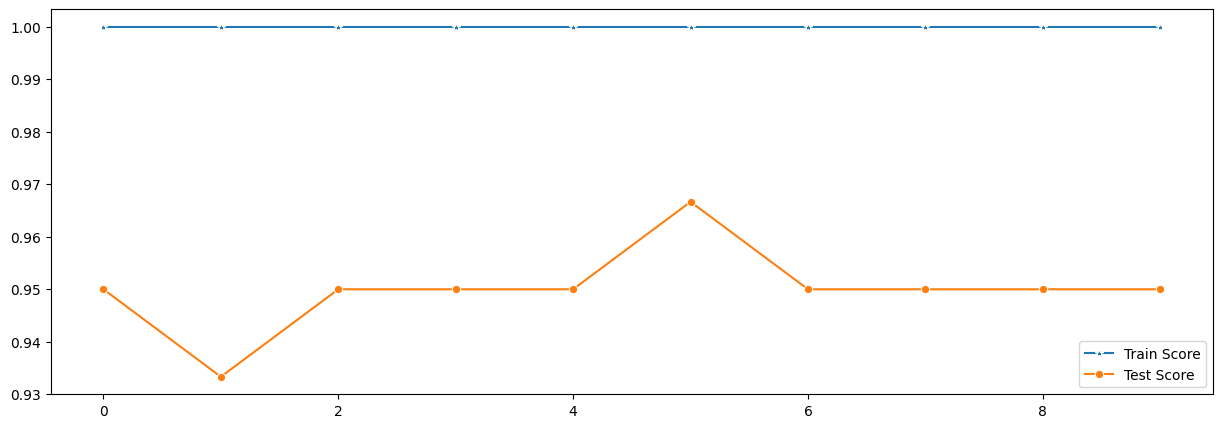

In [50]:
test_score_list=[]
train_score_list=[]

for i in range(0,10):
  rfc2=RandomForestClassifier(random_state=i)
  rfc2.fit(x_train,y_train)
  test_score_list.append(rfc2.score(x_test,y_test))
  train_score_list.append(rfc2.score(x_train,y_train))

plt.figure(figsize=(15,5))
p=sns.lineplot(x=range(0,10),y=train_score_list,marker='*',label='Train Score')
p=sns.lineplot(x=range(0,10),y=test_score_list,marker='o',label='Test Score')

ㄴ최적의 random_state찾기

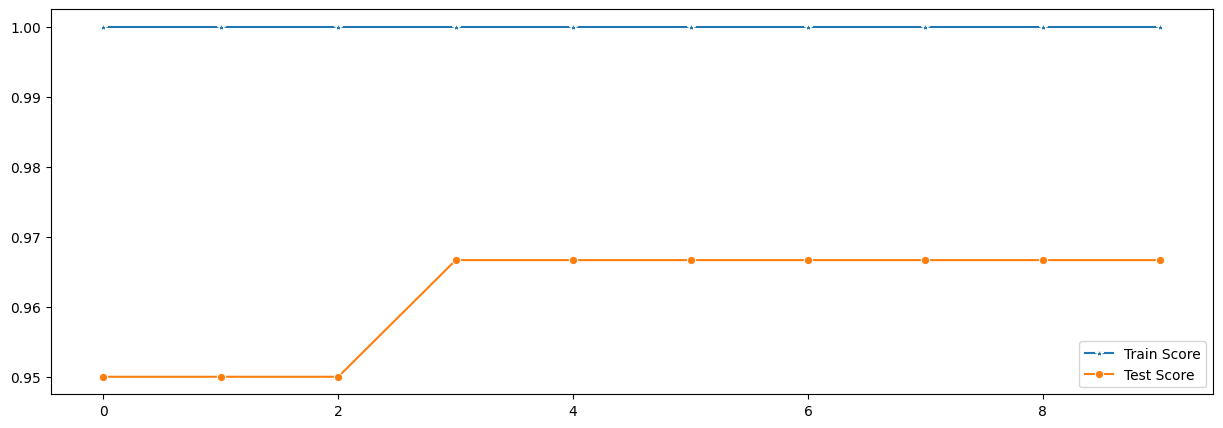

In [52]:
test_score_list=[]
train_score_list=[]

list_n_estimators=[10,20,30,40,50,60,70,80,90,100]

for i in range(0,len(list_n_estimators)):
  rfc3=RandomForestClassifier(n_estimators=list_n_estimators[i],random_state=5)
  rfc3.fit(x_train,y_train)
  test_score_list.append(rfc3.score(x_test,y_test))
  train_score_list.append(rfc3.score(x_train,y_train))

plt.figure(figsize=(15,5))
p=sns.lineplot(x=range(0,len(list_n_estimators)),y=train_score_list,marker='*',label='Train Score')
p=sns.lineplot(x=range(0,len(list_n_estimators)),y=test_score_list,marker='o',label='Test Score')

ㄴ최적의 best_estimators찾기

In [53]:
last_rfc=RandomForestClassifier(n_estimators=100,random_state=5)
last_rfc.fit(x_train,y_train)
predict=last_rfc.predict(x_test)
print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.9666666666666667


In [54]:
y_pred_en=last_rfc.predict(x_test)

In [55]:
print('Model accuracy score with best parameters:{0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))

Model accuracy score with best parameters:0.9667


In [56]:
y_pred_train_en=last_rfc.predict(x_train)
y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 1, 4, 1, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 1, 3, 2, 3, 4, 2, 0, 0, 3, 3, 1, 3, 3, 4, 4, 4, 4, 3,
       1, 0, 0, 2, 4, 3, 4, 1, 4, 4, 1, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 1, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 2, 3, 1, 1, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [57]:
print('Training-set acciracu scpre:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_en)))

Training-set acciracu scpre:1.0000


In [58]:
print('Training set score:{:.4f}'.format(last_rfc.score(x_train,y_train)))
print('Test set score:{:.4f}'.format(last_rfc.score(x_test,y_test)))

Training set score:1.0000
Test set score:0.9667


Evaluation Classification Models

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

cm_des=DecisionTreeClassifier()
cm_des.fit(x_train,y_train)
y_pred_cm=cm_des.predict(x_test)
y_true=y_test
cm_des1=confusion_matrix(y_true,y_pred_cm)
cm_des1

array([[ 4,  0,  2,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

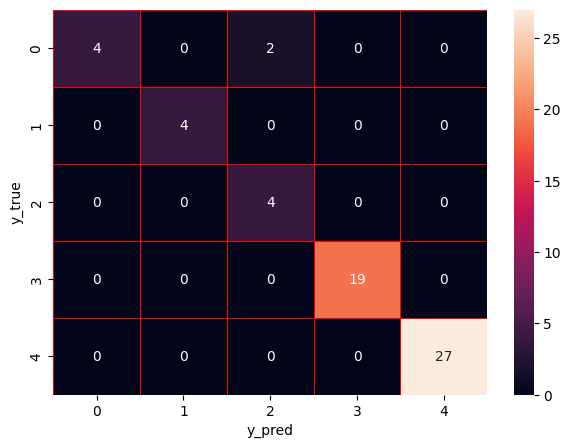

In [61]:
f,ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm_des1,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

ㄴ파라미터 없는 결정트리에 대한 confusion matrix

In [64]:
cm_des_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
cm_des_gini.fit(x_train,y_train)
y_pred_cm=cm_des_gini.predict(x_test)
y_true=y_test
cm_des2=confusion_matrix(y_true,y_pred_cm)
cm_des2

array([[ 4,  0,  2,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

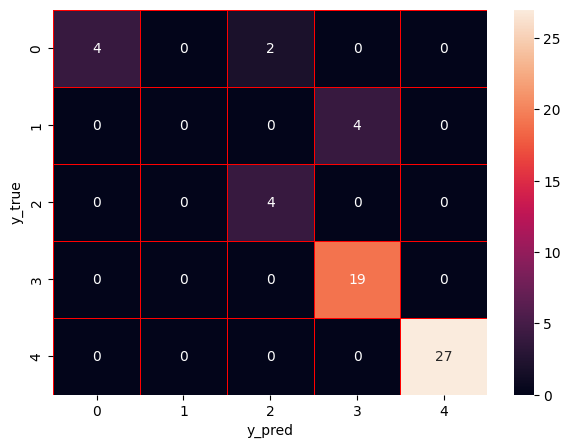

In [65]:
f,ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm_des2,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

ㄴgini결정트리에 대한 confusion matrix

In [67]:
cm_last_rfc=RandomForestClassifier(n_estimators=100,random_state=5)
cm_last_rfc.fit(x_train,y_train)
y_pred_cm=cm_last_rfc.predict(x_test)
y_true=y_test
cm_rfc=confusion_matrix(y_true,y_pred_cm)
cm_rfc

array([[ 4,  0,  2,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

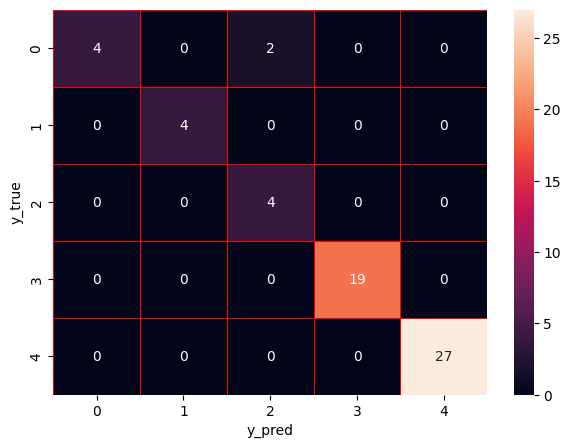

In [68]:
f,ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm_rfc,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

ㄴ최적의 하이퍼 파리미터를 적용한 랜덤 포레스트에 대한  confusion matrix